In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [12]:
a= cv2.imread(r"C:\Users\USERE\Downloads\elxsi\Training\train\angry\Training_3908.jpg")

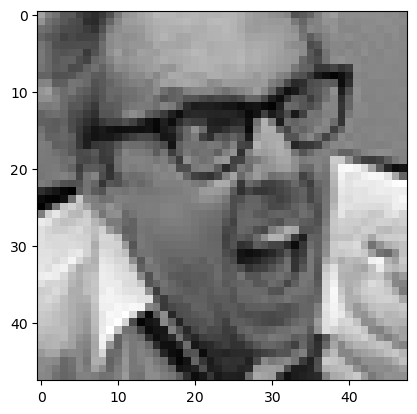

In [13]:
plt.imshow(a)

In [14]:
a.shape

(48, 48, 3)

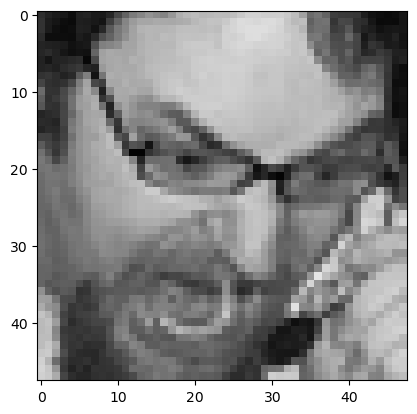

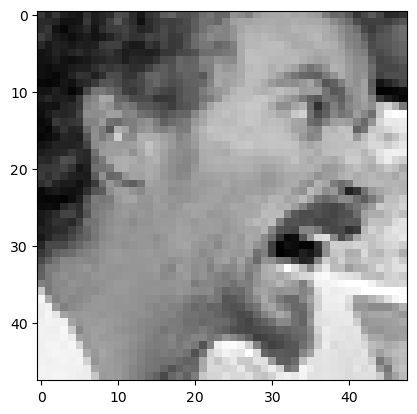

In [37]:
for i in classes:
    ab=0
    path=os.path.join(Datadir,i)
    for x in os.listdir(path):
        b=cv2.imread(os.path.join(path,x))
        plt.imshow(b)
        plt.show()
        ab=ab+1
        if(ab == 2):
            break
        
    break
   

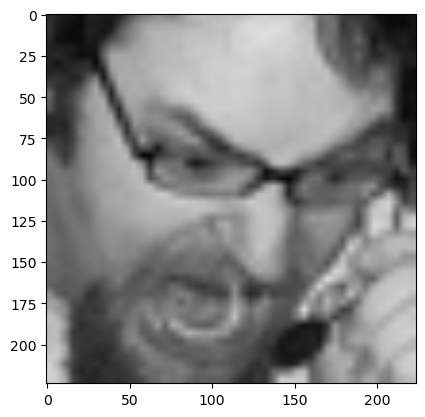

In [31]:
c=cv2.resize(b,(224,224))
plt.imshow(c)

In [32]:
c.shape


(224, 224, 3)

## Working

In [2]:
classes=["0","1","2","3","4","5","6"]

In [3]:
Datadir = r"C:\Users\USERE\Downloads\elxsi\Training\test"

In [4]:
training_data=[]

def cretae_train_data():
    for i in classes:
        path=os.path.join(Datadir,i)
        class_no= classes.index(i) #i
        for img in os.listdir(path):
            try:
                i1=cv2.imread(os.path.join(path,img))
                i2=cv2.resize(i1,(224,224))
                training_data.append([i2,class_no])
            except Exception as e:
                pass

In [5]:
cretae_train_data()

In [35]:
print(len(training_data))

7178


In [7]:
temp=np.array(training_data,dtype=object)
temp.shape

(7178, 2)

In [30]:
import random
random.shuffle(training_data)

In [9]:
X=[]
Y=[]

for features,label in training_data:
    X.append(features)
    Y.append(label)
    
X=np.array(X).reshape(-1,224,224,3)

In [10]:
X.shape
    

(7178, 224, 224, 3)

In [33]:
#norm=np.zeros((7178,2))
#cv2.normalize(X,norm,0,255,cv2.NORM_MINMAX)
X=X/255

array([[[[242, 242, 242],
         [242, 242, 242],
         [241, 241, 241],
         ...,
         [170, 170, 170],
         [170, 170, 170],
         [170, 170, 170]],

        [[242, 242, 242],
         [242, 242, 242],
         [241, 241, 241],
         ...,
         [170, 170, 170],
         [170, 170, 170],
         [170, 170, 170]],

        [[241, 241, 241],
         [241, 241, 241],
         [241, 241, 241],
         ...,
         [168, 168, 168],
         [168, 168, 168],
         [168, 168, 168]],

        ...,

        [[172, 172, 172],
         [172, 172, 172],
         [172, 172, 172],
         ...,
         [116, 116, 116],
         [117, 117, 117],
         [117, 117, 117]],

        [[172, 172, 172],
         [172, 172, 172],
         [172, 172, 172],
         ...,
         [114, 114, 114],
         [115, 115, 115],
         [115, 115, 115]],

        [[172, 172, 172],
         [172, 172, 172],
         [172, 172, 172],
         ...,
         [114, 114, 114],
        

In [40]:
Y[7000]

2

In [14]:
type(Y)

list

In [43]:
y=np.array(Y)
x=np.array(X)

In [16]:
y.shape

(7178,)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [18]:
model = tf.keras.applications.MobileNetV2()

In [19]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [20]:
base_input = model.layers[0].input

In [21]:
base_output = model.layers[-2].output

In [22]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [23]:
final_output = layers. Dense (128) (base_output)

final_ouput = layers. Activation( 'relu') (final_output)

final_output = layers.Dense (64) (final_ouput)

final_ouput = layers.Activation('relu')(final_output) 

final_output = layers.Dense(7,activation='softmax')(final_ouput)

In [24]:

final_output 

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [25]:
new_model= keras.Model(inputs=base_input,outputs=final_output)

In [26]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [27]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [45]:
new_model.fit(x,y,epochs=25)

Epoch 1/25
225/225 [==============================] - 1103s 5s/step - loss: 1.4242 - accuracy: 0.4518
Epoch 2/25
225/225 [==============================] - 1040s 5s/step - loss: 1.2236 - accuracy: 0.5364
Epoch 3/25
225/225 [==============================] - 1028s 5s/step - loss: 1.1079 - accuracy: 0.5745
Epoch 4/25
225/225 [==============================] - 2413s 11s/step - loss: 1.0259 - accuracy: 0.6080
Epoch 5/25
225/225 [==============================] - 1086s 5s/step - loss: 0.9386 - accuracy: 0.6471
Epoch 6/25
225/225 [==============================] - 1156s 5s/step - loss: 0.8821 - accuracy: 0.6686
Epoch 7/25
225/225 [==============================] - 1047s 5s/step - loss: 0.8167 - accuracy: 0.6885
Epoch 8/25
225/225 [==============================] - 1162s 5s/step - loss: 0.7392 - accuracy: 0.7236
Epoch 9/25
225/225 [==============================] - 1168s 5s/step - loss: 0.6916 - accuracy: 0.7430
Epoch 10/25
225/225 [==============================] - 1164s 5s/step - loss: 0.59